In [12]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets
import seaborn as sns

import frame_whitening as fw
import frame_whitening.simulation_new as sim

data = sklearn.datasets.load_digits()

idx = 99
# plt.imshow(data.data[idx].reshape(8, 8))

mu = data.data.mean(0, keepdims=True)
X0 = data.data - mu

I = np.eye(X0.shape[1])
alpha = 0.0001

# whiten X0
Cxx = np.cov(X0.T)
L, V = np.linalg.eigh(Cxx)
L = np.clip(L, 0, np.inf) + alpha

L_inv_sqrt = np.diag(np.sqrt(1 / L))
Mw = V @ L_inv_sqrt @ V.T

X = X0 @ Mw
Cww = np.cov(X.T)

W64 = fw.normalize_frame(np.random.randn(64, 64*(64+1)//2))
Lxx = np.linalg.cholesky(alpha * I + Cxx)
g, g_all, errors, variances = sim.simulate([Lxx], W64, 0, 5000, .01, g0=None, online=False, seed=42069)

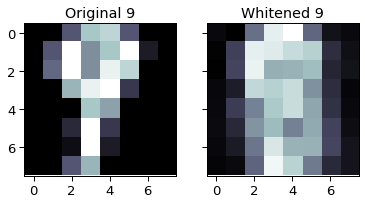

In [10]:
with sns.plotting_context("paper", font_scale=1.5):
    fig, ax = plt.subplots(1, 2, figsize=(6, 3), sharex="all", sharey="all")
    idx = 69
    ax[0].imshow(X0[idx].reshape(8, 8) + mu.reshape(8, 8), cmap="bone")
    ax[1].imshow(X[idx].reshape(8, 8) + mu.reshape(8, 8), cmap="bone")

    ax[0].set(title=f"Original {data.target[idx]}")
    ax[1].set(title=f"Whitened {data.target[idx]}")